# Norm


 $\|\cdot\|: \mathbb{C}^m \rightarrow \mathbb{R}$ is a norm iff:

* (Negatif olmama) $\|x\| \geq 0$, $\|x\| = 0 \Leftrightarrow x = 0$
* (Üçgen Eşitsizliği) $\|x+y\| \leq \|x\| + \| y \|$
* (Ölçekleme) $\|\alpha x\| = |\alpha|\|x\|$  for a scalar $\alpha$,  


## Vektör Normları

### Öklid $\ell_2$ norm 

\begin{eqnarray}
\|x\|_2 & = & \left(x_1^2 + x_2^2 + \dots + x_N^2\right)^{\frac{1}{2}}
\end{eqnarray}

 $\|x\|$.

### The $\ell_1$ and $\max$-norms 

Other norms are:
\begin{eqnarray}
\|x\|_1 & = &  \left|x_1\right| + \left|x_2\right| + \dots + \left|x_N\right|
\end{eqnarray}

\begin{eqnarray}
\|x\|_\infty & = &  \max\{\left|x_1\right|,\left|x_2\right|,\dots,\left|x_N\right|\}
\end{eqnarray}

### $p$-norm

and more general $p$ norms
\begin{eqnarray}
\|x\|_p & = & \left( \left|x_1\right|^p + \left|x_2\right|^p + \dots + \left|x_N\right|^p\right)^{\frac{1}{p}}
\end{eqnarray}




## Norm Balls

Given a $p \geq 1$, a $p$-norm ball is the set of points 
$$
B_p = \{ x : \| x \|_p \leq 1 \}
$$


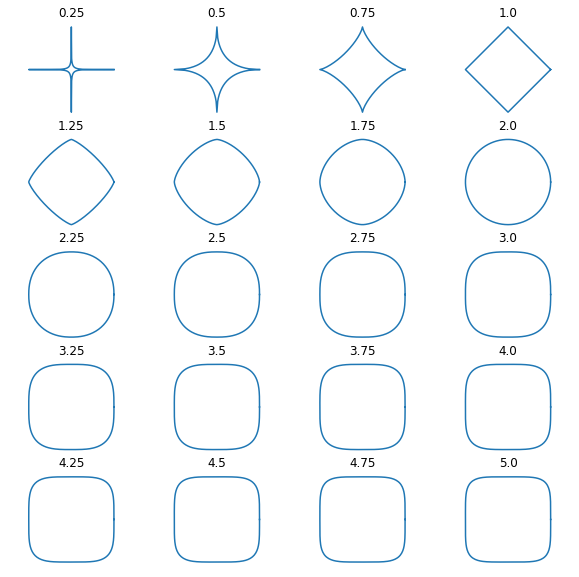

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt


def norm_ball(p):
    step = np.pi/128
    THETA = np.arange(0, 2*np.pi+step, step)
    X = np.mat(np.zeros((2,len(THETA))))
    for i, theta in enumerate(THETA):
        x = (np.cos(theta), np.sin(theta))
        a = (1/(np.abs(x[0])**p + np.abs(x[1])**p ))**(1/p)
        X[:, i] = a*np.mat(x).T
        
    return X


P = np.arange(0.25,5.25,0.25)
#print(X)
fig = plt.figure(figsize=(10,10))
NumPlotRows = 5
NumPlotCols = 4

for i,p in enumerate(P):

    X = norm_ball(p=p)
    plt.subplot(NumPlotRows, NumPlotCols, i+1)
    plt.plot(X[0,:].T, X[1,:].T,'-',clip_on=False)
    ax = fig.gca()
    ax.set_xlim((-2,2))
    ax.set_ylim((-2,2))
    ax.axis('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #plt.plot(X[0,:].tolist())
    for loc, spine in ax.spines.items():
        spine.set_color('none')  # don't draw spine

    plt.title(p)
    
plt.show()

## Weighted norms
For an arbitrary nonsingular matrix $W$,

$$
\|x\|_W = \|Wx\| 
$$


## The Matrix norm

Matrix Norm:
* (Nonnegativity) $\|A\| \geq 0$, $\|A\| = 0 \Leftrightarrow A = 0$
* (Triangle Inequality) $\|A+B\| \leq \|A\| + \| B \|$
* (Scaling) $\|\alpha A\| = |\alpha|\|A\|$  for a scalar $\alpha$,  


\begin{eqnarray}
\|A\|_{(p,q)} = \sup_{\|x\|\neq 0} \frac{\|A x\|_{(p)}}{\|x\|_{(q)}} = \sup_{\|x\|_{(q)} = 1} {\|A x\|_{(p)}}
\end{eqnarray}

This is the maximum $p$-norm of the vector $Ax$ where $x$ is an element of the unit $q$-norm-ball.  

Below, we show the image $Y$ of a set of points on the unit $q$-norm ball, i.e. $Y = \{y : y = Ax; \|x\|_q = 1 \}$. The dotted lines are the points that have $\|y\|_p = r$.

Given the image, what can you say about $\|A\|_{(p,q)}$ ? 
 

In [8]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=3, suppress=True)

# Demonstrates the image of a normball 
# under a linear transformation matrix 
#

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

def pnorm_ball_points(A=np.eye(2), mu=np.array([0,0]),p=2, N=128):
    '''
    Creates the points on a p normball y = A x + \mu 
    where x are points on the unit circle.
    '''
    if p is np.infty:
    	X = np.array([[1,1],[1,-1],[-1,-1],[-1,1],[1,1]]).T
    else:
	    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
	    X = np.array([np.cos(th),np.sin(th)])
	    X = X*(1/(np.abs(X[0,:])**p + np.abs(X[1,:])**p ))**(1/p)


    Y = np.dot(A, X)
    data_x = mu[0]+Y[0,:]
    data_y = mu[1]+Y[1,:]
    return data_x, data_y

import matplotlib.pylab as plt

def pnorm_ball_line(A=np.eye(2), mu=np.array([0,0]),p=2, N=128,color='r',linewidth=3):
	'''	Creates line objects. Show them with ax.add_line(ln) '''
	dx,dy = pnorm_ball_points(A, mu)
	ln = plt.Line2D(dx,dy, color=color, linewidth=linewidth)
	return ln

def bmatrix(a):
    """Returns a LaTeX bmatrix
    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'$\left(\begin{array}{cc}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{array}\right)$']
    return ''.join(rv)

##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
##rc('text', usetex=True)


In [9]:
#@title {vertical-output:true}

fig = plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

dx,dy = pnorm_ball_points()
ln_domain_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')
ln_e1 = plt.Line2D([0,1],[0,0],markeredgecolor='k', marker='o', color='b')
ln_e2 = plt.Line2D([0,0],[0,1],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

dx,dy = pnorm_ball_points()
ln_measure_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='k',linestyle=':')

dx,dy = pnorm_ball_points()
ln_range_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b',linestyle='-')
ln_e1range = plt.Line2D([0,1],[0,0],markeredgecolor='k', marker='o', color='b')
ln_e2range = plt.Line2D([0,0],[0,1],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_xlim((-4,4))
ax1.set_ylim((-4,4))

ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$')
ax2.set_xlim((-4,4))
ax2.set_ylim((-4,4))

ax1.add_line(ln_domain_ball)
ax1.add_line(ln_e1)
ax1.add_line(ln_e2)

ax2.add_line(ln_range_ball)
ax2.add_line(ln_measure_ball)
#txt = ax2.text(-1,-3,'$\left(\right)$',fontsize=15)
#txtr = ax2.text(1,1,'$\left(\right)$',fontsize=15)

ax2.add_line(ln_e1range)
ax2.add_line(ln_e2range)

plt.close(fig)

MAX_p = 5
MAX_q = 5

def set_line(a_11=1, a_21=0, a_12=0, a_22=1, q=2, r=2, p=2):
    A = np.array([[a_11, a_12],[a_21, a_22]])
    if p == MAX_p:
    	p = np.inf
    if q == MAX_q:
    	q = np.inf

    #S = A.dot(A.T)
    dx,dy = pnorm_ball_points(np.eye(2),p=q)
    ln_domain_ball.set_xdata(dx)
    ln_domain_ball.set_ydata(dy)
    dx,dy = pnorm_ball_points(A,p=q)
    ln_range_ball.set_xdata(dx)
    ln_range_ball.set_ydata(dy)
    ln_e1range.set_xdata(np.c_[0,A[0,0]])
    ln_e1range.set_ydata(np.c_[0,A[1,0]])
    ln_e2range.set_xdata(np.c_[0,A[0,1]])
    ln_e2range.set_ydata(np.c_[0,A[1,1]])

    dx,dy = pnorm_ball_points(r*np.eye(2),p=p)
    ln_measure_ball.set_xdata(dx)
    ln_measure_ball.set_ydata(dy)
    
    #txt.set_text(bmatrix(A))
    #txtr.set_text(r)
    #txtr.set_x(r)
    #txtr.set_y(r)
    
    display(fig)
    #ax.set_axis_off()
    
#set_line()
interact(set_line, a_11=(-2,2,0.01), a_12=(-2, 2, 0.01), a_21=(-2, 2, 0.01), a_22=(-2, 2, 0.01), q=(0.1,MAX_q,0.1), r=(0.2,5,0.1), p=(0.1,MAX_p,0.1))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdhXzExJywgbWF4PTIuMCwgbWluPS0yLjAsIHN0ZXA9MC4wMSksIEZsb2F0U2xpZGVyKHbigKY=


<function __main__.set_line>

## Frobenius Norm 

$\|A\|_F = \sqrt{Tr(A^\top A)}$

We show that the function $\|A\|_F$ is a norm:

Nonegativity and Scaling are obvious. The triangle inequality is:

\begin{eqnarray}
\|A + B \|_F^2 & = & Tr((A + B)^\top (A + B) ) \\
& = & Tr(A^\top A + B^\top B + A^\top B + B^\top A) \\
& = & Tr(A^\top A) + Tr(B^\top B) + 2 Tr(B^\top A) \\
& = & \|A\|_F^2 + \|B\|_F^2 + 2 Tr(B^\top A) \\
& \leq & \|A\|_F^2 + \|B\|_F^2 + 2 |Tr(B^\top A)| \\
& \leq & \|A\|_F^2 + \|B\|_F^2 + 2 \|A\|_F \|B\|_F \\
& = & (\|A\|_F + \| B \|_F)^2
\end{eqnarray}

Cauchy-Schwarz for the Frobenius norm 
\begin{eqnarray}
|Tr(B^\top A)| \leq \|A\|_F \|B\|_F
\end{eqnarray}
holds as
\begin{eqnarray}
Tr(B^\top A) & = & vec(B)^\top vec(A) \\
\|A\|_F & = &  \|vec(A)\|_2
\end{eqnarray}




Let $C = AB$. Hence, $c_{i,j} = a_i^\top b_j$ where $a_i^\top$ is the $i$'th row of $A$ and $b_j$ is the $j$'th column of $B$

\begin{eqnarray}
\| A B \|_F^2 & = & \sum_{i} \sum_j |c_{i,j} |^2 \\
& = & \sum_{i} \sum_j |a^\top_{i} b_j |^2 \\
& \leq & \sum_{i} \sum_j \|a_i\|^2 \|b_j\|^2  \\
& = & \left(\sum_{i} \|a_i\|^2 \right) \left(\sum_j  \|b_j\|^2 \right)\\
& = & \| A \|_F^2 \| B \|_F^2 \\
\end{eqnarray}
Hence 
$$
\| A B \|_F \leq  \| A \|_F \| B \|_F
$$



## Drawing norm-balls in 2-D

Calculate the points in polar coordinates. 

In $2$D, take rays of the form 
$$x = \left( \begin{array}{c} x_1 \\ x_2 \end{array} \right) = 
\left( \begin{array}{c} \alpha \cos(\theta) \\ \alpha \sin(\theta) \end{array} \right)
$$
where $\alpha>0$ and $0\leq \theta \leq 2\pi$.

The $p$-norm of a vector $x$ with $\|x\|_p = 1 $ satisfies 

$\left|x_1\right|^p + \left|x_2\right|^p = \alpha^p (\left|\cos(\theta)\right|^p + \left|\sin(\theta)\right|^p) = 1 $

Solve for $\alpha(\theta)$:
$$\alpha = \left(\frac{1}{\left|\cos(\theta)\right|^p + \left|\sin(\theta)\right|^p}\right)^{1/p} $$

### 3.1 

Prove that $\|x\|_W = \|Wx\|$ is a norm for any nonsingular matrix.

* Nonnegativity $\|x\|_W \geq 0$, $\|x\|_W = 0$ iff $x=0$.

$\|x\|_W $ is nonnegative as $\|\cdot\|$ is.

Assume $x\neq 0$ and
$$
Wx = 0
$$. But as $W$ is nonsingular we have $x = W^{-1} 0 = 0$, that leads to a contradiction.

* Scaling 

$$ \|\alpha x\|_W = \|\alpha Wx\| = \left|\alpha\right| \|Wx\| = \left|\alpha\right|\| x\|_W
$$

* Triangle Inequality

$$ \|\ x+ y \|_W = \|Wx+Wy\| \leq \|Wx\| + \|Wy\| = \|x\|_W + \|y\|_W 
$$

### 3.3

$$
\|x\|_\infty \leq \|x\|_2
$$

$$
\|x\|_2 \leq \sqrt{2} \|x\|_\infty 
$$

### 3.4

Let $B$ be a submatrix of $A$. 
* How can we choose $E_r$ and $E_c$ to write $B = E_r A E_c$
* Show that $\|B\| \leq \|A\|$

### 3.6

Dual norm $\|x\|' = \sup_{\|y\|=1} \left| y^* x \right| $


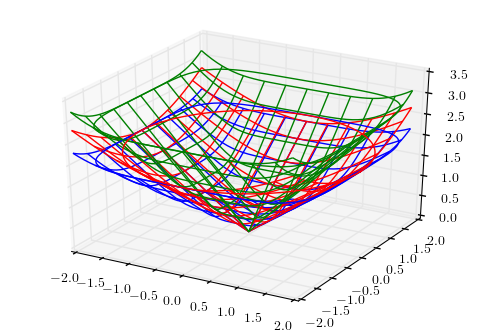

In [ ]:
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from notes_utilities import pnorm_ball_points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.

x = np.arange(-2,2,0.1)

X, Y = np.meshgrid(x, x)

p2 = 2
p = p2
Z2 = (np.abs(X)**p + np.abs(Y)**p)**(1./p) 

p1 = 5
p = p1
Z = (np.abs(X)**p + np.abs(Y)**p)**(1./p) 

r = 2
dx, dy = pnorm_ball_points(p=p1)

ax.plot(r*dx,r*dy,r*np.ones_like(dx), color='b')
ax.plot(r*dx,r*dy,np.sqrt(2.)*r*np.ones_like(dx), color='g')
dx, dy = pnorm_ball_points(p=p2)
ax.plot(r*dx,r*dy,r*np.ones_like(dx), color='r')


# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.plot_wireframe(X, Y, Z2, rstride=4, cstride=4, color='r' )
ax.plot_wireframe(X, Y, np.sqrt(2.)*Z, rstride=4, cstride=4, color='g' )

plt.show()
